In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pathlib
import joblib 
from IPython.display import display
import sqlite3
import sqlalchemy
import unittest
import warnings as wrn
#my  modules
from test_functions import *
wrn.filterwarnings('ignore')

### Loading files

In [2]:
display(train.head(1))
display(testdata.head(1))
display(ideal.head(1))

,x,y1,y2,y3,y4
0,-20.0,-45.29234,-15999.796,99.52958,899.8275


,x,y
0,-13.1,-4494.98


,x,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y41,y42,y43,y44,y45,y46,y47,y48,y49,y50
0,-20.0,-0.912945,0.408082,9.087055,5.408082,-9.087055,0.912945,-0.839071,-0.850919,0.816164,...,-40.456474,40.20404,2.995732,-0.008333,12.995732,5.298317,-5.298317,-0.186278,0.912945,0.39685


In [3]:
#different instances are now readable and can be visualized by Bokeh:
display((Twodimentional_data_x_and_y('train', 'y1')).retrieve())

,x,y1
0,-20.0,-45.292340
1,-19.9,-44.364960
2,-19.8,-44.565968
3,-19.7,-44.762450
4,-19.6,-44.188698
...,...,...
395,19.5,34.150510
396,19.6,33.875698
397,19.7,33.952816
398,19.8,34.517270


In [4]:
display((Twodimentional_data_x_and_y('ideal', 'y1')).visualize())

None

### Detecting match

In [5]:
# to calculate mean squared error between noisy y and ideal y 
# we must first ensure that they have the same x datapoints
# then detect match
if train.x.equals(ideal.x):
    detect_match(train, ideal) #which equations fits for the 4 training functions most?
else:
    print('they dont have the same x values')

function ['y13'] best fit y1 with minimum value equal to 0.08520176895366426
function ['y24'] best fit y2 with minimum value equal to 0.08362940238279103
function ['y36'] best fit y3 with minimum value equal to 0.0889317509894231
function ['y40'] best fit y4 with minimum value equal to 0.08749718703300567


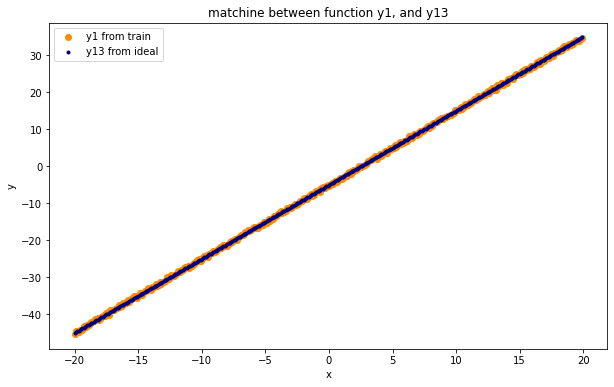

In [6]:
 # confirm match visually by matplotlib library
# you can try different functions 
visualize_2functions(functiontrain='y1', functionideal='y13')

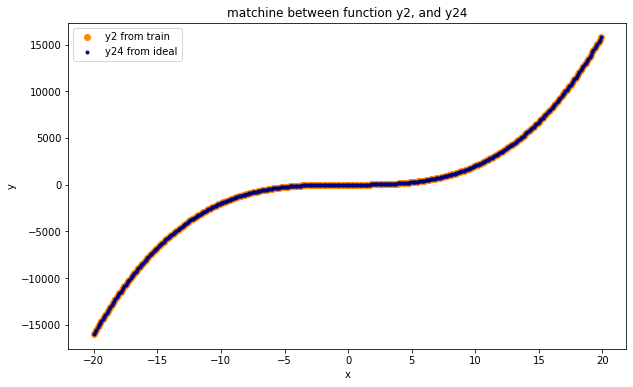

In [7]:
visualize_2functions(functiontrain='y2', functionideal='y24')

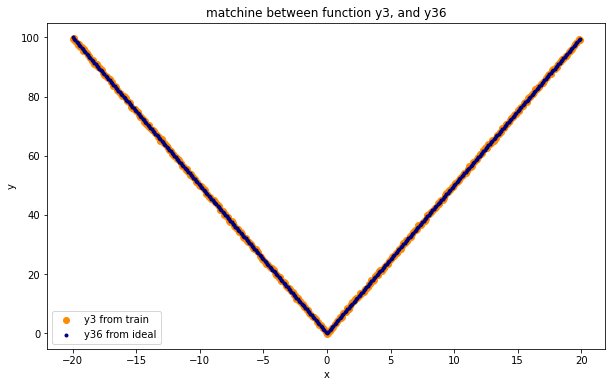

In [8]:
visualize_2functions(functiontrain='y3', functionideal='y36')

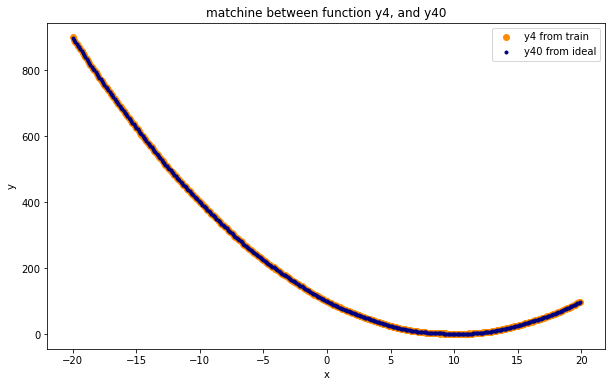

In [9]:
visualize_2functions(functiontrain='y4', functionideal='y40')

In [10]:
# Creating machine learning models for the 4 functions by training on the ideal functions.
columns=['x', 'y13', 'y24', 'y36', 'y40']

# data=ideal[columns]
x=ideal[['x']]
for each in columns[1:]:
    y=ideal[each]
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, shuffle=True)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(x_train, y_train)
    model_filename = path + each +"_model.pkl"
    joblib.dump(model, model_filename)

In [11]:
# group matching functions in a dictionary together
ideal_match_train_dictionary={'y13': 'y1',
                              'y24': 'y2',
                               'y36': 'y3',
                               'y40': 'y4'}

In [12]:
#iterate through models in the directory, create predicted columns and deviation columns
#in train and test data :

largest_deviation_dictionary={}
for eachmodel in pathlib.Path(path).iterdir():
    if eachmodel.name[-3:]=='pkl':           
        model_name=eachmodel.name[-13:-10]   #like y13
        loaded_model= joblib.load(eachmodel)
        #create testdata column with predicted value from the model
        testdata['predicted_from_'+model_name+'_model']=loaded_model.predict(testdata[['x']])
        #create another column with calculated deviation (Eucladian) distance or (sqroot).
        testdata['deviation_from_'+model_name+'_model']=deviation(testdata['predicted_from_'+model_name+'_model'],testdata['y'])

        #create train column with predicted value from the model
        train['predicted_from_'+model_name+'_model']=loaded_model.predict(train[['x']])
        #create another column with calculated deviation (Eucladian) distance or (sqroot).
        train['deviation_from_'+model_name+'_model']=deviation(train['predicted_from_'+model_name+'_model'], train[ideal_match_train_dictionary[model_name]])

        largest_deviation_dictionary[model_name]=train['deviation_from_'+model_name+'_model'].max()
        print(f"the largest deviation between {model_name} and {ideal_match_train_dictionary[model_name]} is {train['deviation_from_'+model_name+'_model'].max()}")
        
        
display(testdata.head(3))
display(train.head(3))

the largest deviation between y13 and y1 is 0.7375449999999866
the largest deviation between y24 and y2 is 365.14833999999973
the largest deviation between y36 and y3 is 0.9309499999999957
the largest deviation between y40 and y4 is 5.969420999999784


,x,y,predicted_from_y13_model,deviation_from_y13_model,predicted_from_y24_model,deviation_from_y24_model,predicted_from_y36_model,deviation_from_y36_model,predicted_from_y40_model,deviation_from_y40_model
0,-13.1,-4494.980000,-31.246,4463.734000,-4518.17494,23.194940,65.575,4560.555000,533.784287,5028.764287
1,3.4,78.957020,1.884,77.073020,80.55816,1.601140,17.070,61.887020,44.020924,34.936096
2,11.1,2.493696,17.152,14.658304,2766.17142,2763.677724,55.775,53.281304,1.154543,1.339153


,x,y1,y2,y3,y4,predicted_from_y13_model,deviation_from_y13_model,predicted_from_y24_model,deviation_from_y24_model,predicted_from_y36_model,deviation_from_y36_model,predicted_from_y40_model,deviation_from_y40_model
0,-20.0,-45.292340,-15999.796,99.52958,899.82750,-44.588,0.704340,-15785.30534,214.49066,99.750,0.22042,896.257839,3.569661
1,-19.9,-44.364960,-15761.017,99.89567,893.42740,-44.588,0.223040,-15677.84444,83.17256,99.545,0.35067,894.008572,0.581172
2,-19.8,-44.565968,-15524.681,98.85578,887.16046,-44.588,0.022032,-15409.32848,115.35252,98.895,0.03922,885.898627,1.261833


In [13]:
largest_deviation_dictionary

{'y13': 0.7375449999999866,
 'y24': 365.14833999999973,
 'y36': 0.9309499999999957,
 'y40': 5.969420999999784}

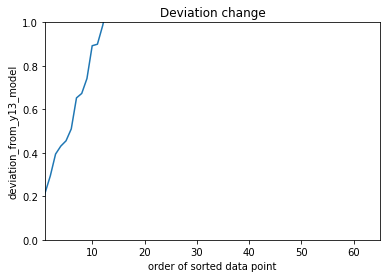

In [14]:
    """visualize deviation value against sorted data point, is it smooth increase or
    there may has an abrupt change? 
    the first argument takes string of model name, the second takes list which represents maximum limits of x and y"""
visualize_deviation('y13', [65, 1])

### Assigning each point to its corresponding function

In [15]:
testdata['function']= np.nan #adding empty column

# applying requisted criterion for mapping points.
print(testdata.shape)
modified=testdata[testdata['deviation_from_y40_model'] <= largest_deviation_dictionary['y40'] ]
print(modified.shape)
# map the points to its function
testdata.iloc[modified.index, -1]='y40'
testdata.function.value_counts()

(100, 11)
(25, 11)


y40    25
Name: function, dtype: int64

In [16]:
modified=testdata[testdata['deviation_from_y24_model'] <= largest_deviation_dictionary['y24'] ]
testdata.iloc[modified.index, -1]='y24'
modified=testdata[testdata['deviation_from_y36_model'] <= largest_deviation_dictionary['y36'] ]
testdata.iloc[modified.index, -1]='y36'
modified=testdata[testdata['deviation_from_y13_model'] <= largest_deviation_dictionary['y13'] ]
testdata.iloc[modified.index, -1]='y13'
testdata.function.value_counts()

y24    32
y36    14
y40    13
y13     9
Name: function, dtype: int64

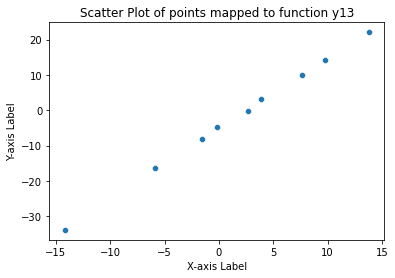

In [18]:
#visualize each group of points separately 
visualize_test_points_to_function('y13')

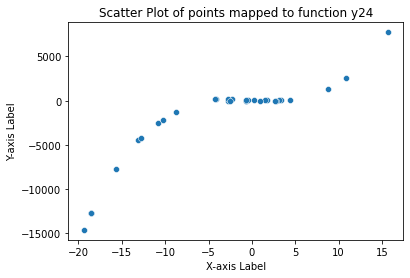

In [19]:
visualize_test_points_to_function('y24')

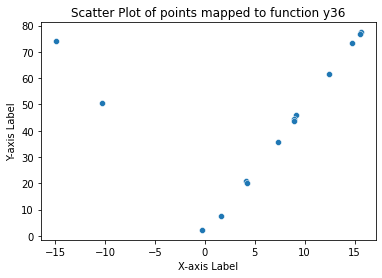

In [20]:
visualize_test_points_to_function('y36')

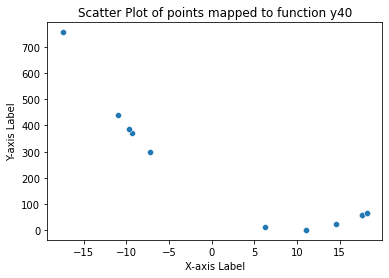

In [21]:
visualize_test_points_to_function('y40')

In [22]:
print(f'There are {testdata.function.isnull().sum()} points from 100 doesnot mapped to any function, we can consider them as outliers or noise.')


There are 32 points from 100 doesnot mapped to any function, we can consider them as outliers or noise.


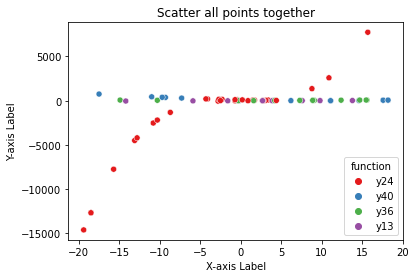

In [23]:
visualize_all_test_points_together('functions', testdata)

In [24]:
# reformating the test data with mapping and y-deviation
testdata.loc[testdata.function=='y13', 'Delta Y (test func)']=testdata.deviation_from_y13_model
testdata.loc[testdata.function=='y24', 'Delta Y (test func)']=testdata.deviation_from_y24_model
testdata.loc[testdata.function=='y36', 'Delta Y (test func)']=testdata.deviation_from_y36_model
testdata.loc[testdata.function=='y40', 'Delta Y (test func)']=testdata.deviation_from_y40_model

result=testdata[['x', 'y', 'Delta Y (test func)', 'function']]
result.rename({'x': 'X (test func)',
                'y': 'Y (test func)',
                'function': 'No. of ideal func' })
result.head(5)

,x,y,Delta Y (test func),function
0,-13.1,-4494.980000,23.194940,y24
1,3.4,78.957020,1.601140,y24
2,11.1,2.493696,1.339153,y40
3,1.9,-7730.091300,NaN,NaN
4,-14.0,13840.699000,NaN,NaN


### Load into database 

In [36]:
# loading with standard exception handling
try:
    ideal = pd.read_csv('C:/Users/amrma/Downloads/iu/python/dataset/raw/ideal.csv')
    train = pd.read_csv('C:/Users/amrma/Downloads/iu/python/dataset/raw/train.csv')
except:
    print('review location')


In [25]:
#renaming columns of tain, ideal before uploading:
l=[]
for each in train.columns[1:]:
    each=each.capitalize() +'(training func)'
    l.append(each)
train.columns=['X']+l

id_columns=[]
for each_id in ideal.columns[1:]:
    each_id=each_id.capitalize() +' (ideal func)'
    id_columns.append(each_id)
ideal.columns=['X']+id_columns


In [34]:
db_iu='C:/Users/amrma/Downloads/iu/python/dataset/raw/my_assignment.db'
conn = sqlite3.connect(db_iu)

train.to_sql('train' , conn, index=False, if_exists='replace')
ideal.to_sql('ideal' , conn, index=False, if_exists='replace')

# The third table (result) can be directly loaded all at once by the same way
# but lets load each row one by one separately to satisfy the assignment requirement

test=pd.read_csv('C:/Users/amrma/Downloads/iu/python/dataset/raw/test.csv')
test.columns=['X (test func)', 'Y (test func)']
#load models
y13model= joblib.load('C:/Users/amrma/Downloads/iu/python/dataset/raw/y13_model.pkl')
y40model= joblib.load('C:/Users/amrma/Downloads/iu/python/dataset/raw/y40_model.pkl')
y36model= joblib.load('C:/Users/amrma/Downloads/iu/python/dataset/raw/y36_model.pkl')
y24model= joblib.load('C:/Users/amrma/Downloads/iu/python/dataset/raw/y24_model.pkl')


def row_to_be_uploaded(func):
    """func means the name of function like y13, written as string"""
    tobeuploaded=row.copy()   #preparing to be uploaded
    tobeuploaded['Delta Y (test func)'] =tobeuploaded.loc[:,'deviation_from_'+func+'_model']
    tobeuploaded['No. of ideal func'] =func
    tobeuploaded=tobeuploaded[['X (test func)','Y (test func)','Delta Y (test func)','No. of ideal func']]
    #uploading
    tobeuploaded.to_sql('result', conn, if_exists='append', index=False)
        
#iterate through all rows one by one:
for rowindex in range(test.shape[0]):
    row=test[rowindex:rowindex+1].copy()
    
    row['predicted_from_y40_model']=y40model.predict(row[['X (test func)']])
    row['deviation_from_y40_model']=np.sqrt((row['predicted_from_y40_model']-row['Y (test func)'])**2)
    if row.loc[:,'deviation_from_y40_model'][rowindex] < largest_deviation_dictionary['y40']: #if matched the criteria required
        row_to_be_uploaded('y40')
    
    row['predicted_from_y24_model']=y24model.predict(row[['X (test func)']])
    row['deviation_from_y24_model']=np.sqrt((row['predicted_from_y24_model']-row['Y (test func)'])**2)
    if row.loc[:,'deviation_from_y24_model'][rowindex] < largest_deviation_dictionary['y24']: #if matched the criteria required
        row_to_be_uploaded('y24')
        
    row['predicted_from_y36_model']=y36model.predict(row[['X (test func)']])
    row['deviation_from_y36_model']=np.sqrt((row['predicted_from_y36_model']-row['Y (test func)'])**2)
    if row.loc[:,'deviation_from_y36_model'][rowindex] < largest_deviation_dictionary['y36']: #if matched the criteria required
        row_to_be_uploaded('y36')
        
    row['predicted_from_y13_model']=y13model.predict(row[['X (test func)']])
    row['deviation_from_y13_model']=np.sqrt((row['predicted_from_y13_model']-row['Y (test func)'])**2)
    if row.loc[:,'deviation_from_y13_model'][rowindex] < largest_deviation_dictionary['y13']: #if matched the criteria required
        row_to_be_uploaded('y13')
conn.close()

### Github code

The project has a Branch called develop Write the Git-commands necessary to clone the branch.

In [27]:

# we open the terminal.and write
git clone -b develop https://github.com/amrabuzeid87/iuproject.git
    #where amrabuzeid87 is my github username and iuproject is the GitHub repository
#     this will take a copy of this branch in my computer.

SyntaxError: invalid syntax (<ipython-input-27-16c6eb529dde>, line 2)

Imagine you have done with a new function, Write all necessary Git-commands to introduce this project to the team’s develop Branch

In [ ]:
#first I can save the edition in the staging area.
git add .
git commit -m "initial commit"     #or the commit message

In [ ]:
#the I push the changes from my local or staging area to the repository online (in the defined branch 'develop'). 
git push origin develop


After that, when I visit the repository, I will see an option to pull request. I will choose the 'develop' branch, 
where I want to merge my changes with. review and compare my changes, and finally submit the pull request. The team 
supervisor will review my pull request, if my changes approved, he will merge the pull request to the develop branch.


In [28]:
from IPython.core.display import HTML
HTML("<style>.container { width:100% !important; }</style>")